# Basic example: from empirical data to an IB curve

In this notebook we show how to compute and plot an IB curve, starting from two arrays of equal length representing joint observations of random variables $X$ and $Y$. For the purposes of this example, we two a trivial synthetic dataset: one where both $X$ and $Y$ are binary variables (i.e. they can take on one of two possible values, 0 and 1), and one where both $X$ and $Y$ can take on 4 possible values (we use 0, 1, 2, and 3, but these could have been any 4 distinct values).

We start with some preliminaries, by importing `embo` and other useful packages.

In [1]:
# dependencies
import numpy as np
from scipy.stats import entropy
from matplotlib import pyplot as plt

# import embo
from embo import InformationBottleneck

# matplotlib configuration
plt.style.use('style.mplstyle')

We can now define the arrays containing the synthetic data we will compute the IB curves from.

In [2]:
# Define synthetic data with arrays of two symbols
x2 = np.array([1,0,1,0,1,0,1,0,1,0])
y2 = np.array([0,0,0,1,0,1,0,1,0,1])

# Define synthetic data with arrays of four symbols
x4 = np.array([0,1,2,3,0,1,2,3,])
y4 = np.array([0,1,0,3,0,0,2,3,])

We can immediately use `embo` to compute an IB curve from one of these series of joint $(X,Y)$ observations, and plot it with `matplotlib`.

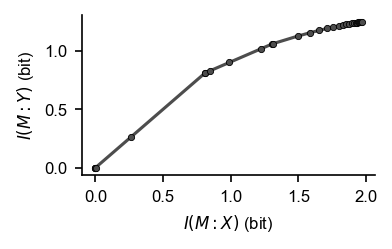

In [3]:
i_x, i_y, h_m, beta = InformationBottleneck(x4,y4).get_bottleneck()
plt.plot(i_x,i_y,marker='.')
plt.xlabel("$I(M:X)$ (bit)")
plt.ylabel("$I(M:Y)$ (bit)");

That's about it. If we want to dig somewhat deeper, we can define a convenience function that computes an IB curve and plots it, with some extra bells and whistles, and use it to compare the two-symbol and the four-symbol cases.

In [4]:
def IB_plot(x,y,ax,title,ax2=None,pad=0.02,**kw):
    """Compute and plot an IB curve"""
    i_x,i_y,h_m,beta,mi,h_x,h_y = InformationBottleneck(x,y,**kw).get_bottleneck(return_entropies=True, )
    ax.plot(np.arange(0,(mi*1.5)+.1,.1),np.arange(0,(mi*1.5)+.1,.1),color='dimgray',linewidth=0.7) # identity line I(M:X)=I(M:Y)
    ax.axhline(mi, linestyle=':', color='tab:red', zorder=-5, linewidth=.5) # upper bound for I(M:Y) is MI(X:Y)
    ax.axvline(h_x, linestyle=':', color='tab:red', zorder=-5, linewidth=.5) # upper bound for I(M:X) is H(X), given that M has the same cardinality as X
    ax.plot(i_x,i_y,color='tab:red',marker='o',markersize=3.5)
    ax.set_ylim(-0.01,(mi*1.1)+.1)
    ax.set_xlim(-.01,(h_x*1.1)+.1)
    ax.set_title('IB Curve - {}'.format(title))
    ax.set_ylabel("$I(M:Y)$ (bit)")
    ax.set_xlabel("$I(M:X)$ (bit)")
    ax.text(ax.get_xlim()[0]+pad, mi-pad, 'I(X:Y)', horizontalalignment='left', verticalalignment='top', fontsize='small')
    ax.text(h_x-pad, ax.get_ylim()[0]+pad, 'H(X)', horizontalalignment='right', verticalalignment='bottom', fontsize='small')
    if not ax2 is None:
        ax2.plot(beta,i_x,label="$I(M:X)$ (bit)",marker='o',markersize=3.5)
        ax2.plot(beta,i_y,label="$I(M:Y)$ (bit)",marker='o',markersize=3.5)
        ax2.legend()
        ax2.set_title('Information vs beta - {}'.format(title))
        ax2.set_xlabel('Beta')
        ax2.set_ylabel('Information (bit)')

We compute and plot the IB curve for both observation sets defined above (two-symbol variables and four-symbol variables).

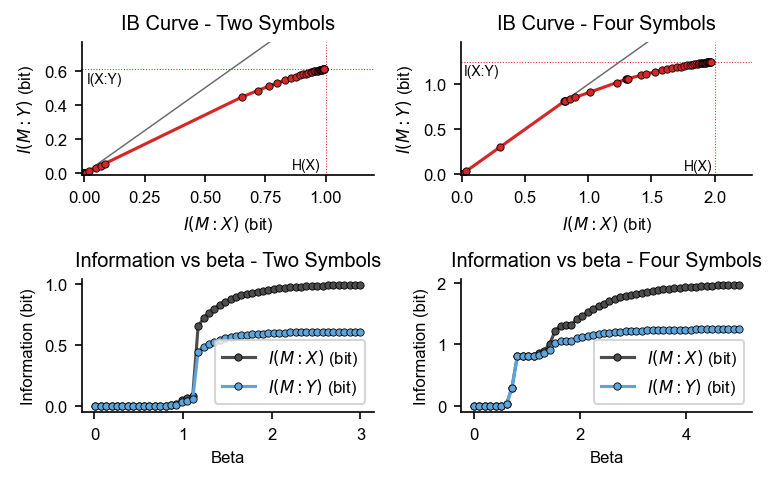

In [5]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=np.array((2,2))*plt.rcParams['figure.figsize'], constrained_layout=True)
IB_plot(x2,y2,ax[0,0],ax2=ax[1,0],maxbeta=3,alpha=1,numbeta=50,title="Two Symbols")
IB_plot(x4,y4,ax[0,1],ax2=ax[1,1],maxbeta=5,alpha=1,numbeta=50,title="Four Symbols")
#fig.savefig('basic_example.pdf')

Note that the IB curve is always below the identity line and that the value of $I(M:Y)$ and $I(M:X)$ is never larger than the base 2 logarithm of the number of states (1 bit and 2 bit respectively, corresponding to 2 and 4 states respectively). These are conditions that the IB curve should always satisfy [[Tishby, Pereira, Bialek 2001]](https://arxiv.org/abs/physics/0004057), and can be taken as sanity checks for embo's correct operation.